# Content and Objective

+ Show approximations by using gaussian approximation
+ Additionally, applying Gram-Schmidt for "orthonormalizing" a set of functions

In [1]:
# importing
import numpy as np
import scipy.signal
import scipy as sp

import sympy as sym
from sympy.plotting import plot


### definitions

In [2]:
# define symbol
x = sym.Symbol('x')

In [3]:
# function to be approximated
f = sym.cos( x )
f = sym.exp( x )
#f = sym.sqrt( x )

# define lower and upper bound for L[a,b] 
# -> might be relevant to be changed if you are adapting the function to be approximated
a = -1
b = 1

### Define Gram-Schmidt

In [4]:
# basis and their number of functions
M = [ x**c for c in range( 0, 4 ) ]

n = len( M )
print(M)

[1, x, x**2, x**3]


In [5]:
# apply Gram-Schmidt for user-defined set M 

# init ONB
ONB = [ ]

# loop for new functions and apply Gram-Schmidt
for _n in range( n ):
   
    # get function
    f_temp = M[ _n ]
    
    # subtract influence of past ONB functions
    if _n >= 1:
        for _k in range( _n ):
            f_temp -= sym.integrate( M[ _n ] * ONB[ _k ], (x,a,b) ) * ONB[ _k ]
            
    # get norm
    norm = float( sym.integrate( f_temp * f_temp , (x,a,b) ) )
    
    # return normalized function
    ONB.append( f_temp / np.sqrt( norm) )

In [6]:
print(ONB)

[0.707106781186547, 1.22474487139159*x, 2.37170824512628*x**2 - 0.790569415042095, 4.67707173346743*x**3 - 2.80624304008046*x]


In [7]:
# opt in if you like to see the correlation matrix
if 0:
    corr_matrix = np.zeros( ( n, n ) )

    for _m in range( n ):
        for _n in range( n ):
            corr_matrix[ _m, _n ] = float( sym.integrate( ONB[_m] * ONB[_n], (x,a,b) ) )

    np.set_printoptions(precision=2)
    corr_matrix[ np.isclose( corr_matrix, 0 ) ] = 0

    print( corr_matrix )        

In [8]:
# opt in if you like to see figures of the base functions
# NOTE: Become unhandy if it's too many of them
if 0:
    for _n in range( n):
        p = plot( M[_n], (x,a,b), show=False )
        p.extend( plot( ONB[_n], (x,a,b), line_color='r', show=False ) )

        p.show()

### now approximate a function

In [9]:
# init approx and extend successively
approx = 0

# add next ONB function with according coefficient
for _n in range( n ):
    
    coeff = sym.integrate( f * ONB[ _n ], (x,a,b) )
    approx += coeff * ONB[ _n ]

# if you like to see the function
print( approx )

3.0*x*exp(-1) + (2.37170824512628*x**2 - 0.790569415042095)*(-11.0679718105893*exp(-1) + 1.58113883008419*E) + (-9.35414346693485*E + 69.2206616553179*exp(-1))*(4.67707173346743*x**3 - 2.80624304008046*x) - 0.5*exp(-1) + 0.5*E


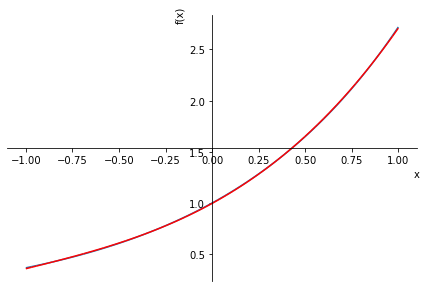

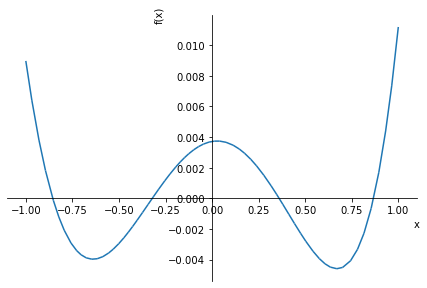

In [10]:
p = plot( f, (x,a,b), show=False) 
p.extend( plot( approx, (x,a,b), line_color='r', show=False) )
p.show()

plot( f - approx, (x,a,b) )